In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
import seaborn as sns

C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


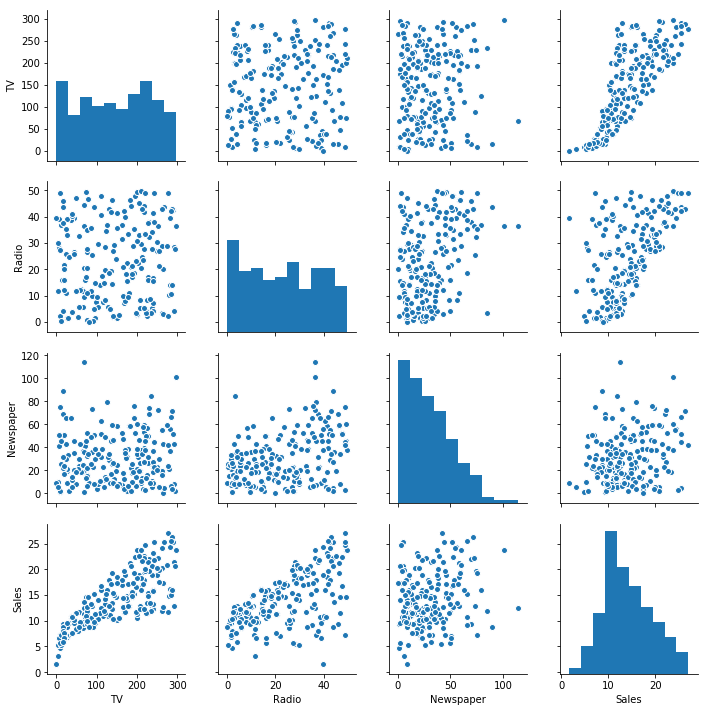

In [9]:
sns.pairplot(df)

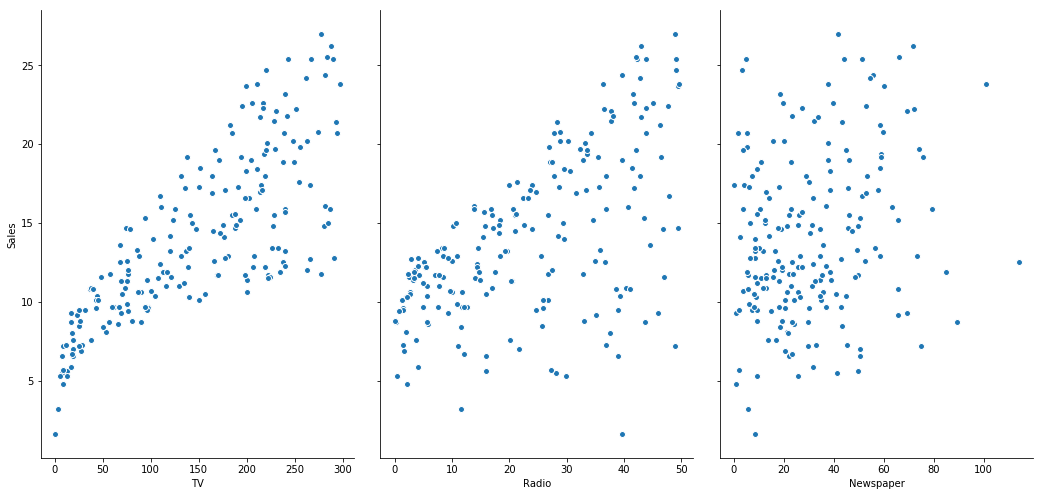

In [10]:
sns.pairplot(df, x_vars= ["TV", "Radio", "Newspaper"], y_vars="Sales", size = 7, aspect=0.7, kind="scatter")

In [11]:
from sklearn.model_selection import train_test_split
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)

In [15]:
ypred = model.predict(X_test)

In [16]:
print(model.intercept_)
print(model.coef_)

2.7094899086915714
[0.0475501  0.18088015 0.00629805]


In [17]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(y_test, ypred), r2_score(y_test, ypred))

2.6227729007514 0.8590575550977457


In [18]:
import statsmodels.api as sm

X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
model1 = sm.OLS(y_train, X_train_sm).fit()

C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Python\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
model1.params

const        2.709490
TV           0.047550
Radio        0.180880
Newspaper    0.006298
dtype: float64

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     421.1
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.28e-68
Time:                        16:34:12   Log-Likelihood:                -273.98
No. Observations:                 140   AIC:                             556.0
Df Residuals:                     136   BIC:                             567.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7095      0.380      7.125      0.000       1.957       3.462
TV             0.0476      0.002     27.850      0.000       0.044       0.051
Radio          0.1809      0.011     16.757      0.000       0.160       0.202
Newspaper      0.0063      0.007      0.843      0.400      -0.008       0.021
==============================================================================
Omnibus:                       46.743   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.436
Skew:                          -1.379   Prob(JB):                     1.04e-24
Kurtosis:                       6.365   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

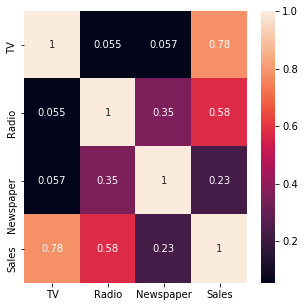

In [24]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True)

In [25]:
X_train_new = X_train[["TV", "Radio"]]
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X_test_new = X_test[["TV", "Radio"]]

In [28]:
ypred_new = model.predict(X_test_new)

Text(0,0.5,'Sales')

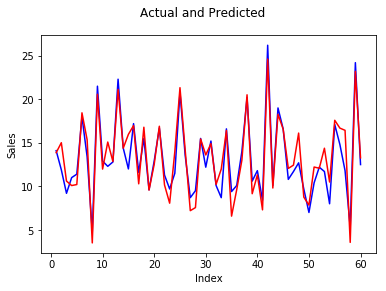

In [29]:
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test, color = "blue", linestyle = "-")
plt.plot(c, ypred, color = "red", linestyle = "-")
fig.suptitle("Actual and Predicted")
plt.xlabel("Index")
plt.ylabel("Sales")

Text(0,0.5,'Ytest - Ypred')

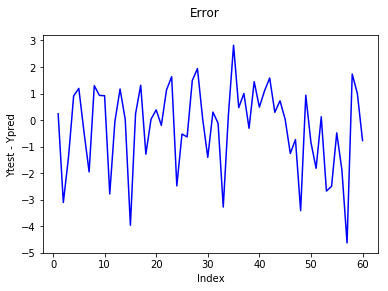

In [30]:
c = [i for i in range(1, 61, 1)]
fig = plt.figure()
plt.plot(c, y_test - ypred, color = "blue", linestyle = "-")
fig.suptitle("Error")
plt.xlabel("Index")
plt.ylabel("Ytest - Ypred")

In [31]:
print(mean_squared_error(y_test, ypred_new), r2_score(y_test, ypred_new))

2.5042756203900027 0.86542535629152


In [32]:
X_train_final = X_train_new
X_train_final = sm.add_constant(X_train_final)
lm_final = sm.OLS(y_train, X_train_final).fit()
lm_final.summary()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     632.7
Date:                Fri, 31 May 2019   Prob (F-statistic):           6.39e-70
Time:                        16:50:31   Log-Likelihood:                -274.34
No. Observations:                 140   AIC:                             554.7
Df Residuals:                     137   BIC:                             563.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8074      0.362      7.760      0.000       2.092       3.523
TV             0.0476      0.002     27.894      0.000       0.044       0.051
Radio          0.1843      0.010     18.403      0.000       0.164       0.204
==============================================================================
Omnibus:                       48.724   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.512
Skew:                          -1.413   Prob(JB):                     4.11e-27
Kurtosis:                       6.583   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Refinement Using RFE

In [37]:
from sklearn.feature_selection import RFE

rfe = RFE(model, 2)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_,"\n",rfe.ranking_)

[ True  True False] 
 [1 1 2]


In [38]:
x_news = df["Newspaper"]
y_news = df["Sales"]

In [41]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_news, y_news, test_size = 0.3, random_state=100)
Xtrain = Xtrain[:,np.newaxis]
Xtest = Xtest[:, np.newaxis]
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
ypred = model.predict(Xtest)

In [43]:
print(mean_squared_error(ytest, ypred), r2_score(ytest, ypred))

22.783129716276214 -0.1588989736629216
